In [1]:
!pip install tensorflow==2.9.1

In [2]:
import tensorflow as tf

In [3]:
import tensorflow_hub as hub

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [5]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.axis('off')
  plt.imshow(image)

def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [6]:
# from PIL import Image, ImageDraw, ImageFont, ImageColor
# import numpy as np

def draw(image, max_boxes, min_score, boxes, class_names, scores):
    '''
    -- params --
    max boxes : maximum number of bounding boxes you want to show in the image
    min_score: threshold value for your desired detection score
    '''
    # get color values from PIL.Image.Color
    colors = list(ImageColor.colormap.values())

    # get font name from PIL.ImageFont
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf", 25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    detected_boxes = boxes.shape[0]

    for i in range(min(max_boxes, detected_boxes)):
        if scores[i] >= min_score:  # if detection score >= your desired score

            ymin, xmin, ymax, xmax = tuple(boxes[i])  # bbox coordinate values

            # decode detected object name with score, example, b'Umbrella' --> Umbrella: 92%
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                           int(100 * scores[i]))

            # set bbox color same to every same class
            color = colors[hash(class_names[i]) % len(colors)]

            # Convert Image to numpy type and RGB
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

            draw_bbox_text_on_image(
                image_pil,
                ymin, xmin,
                ymax, xmax,
                color, font,
                display_str_list=[display_str]
            )
            np.copyto(image, np.array(image_pil))

    return image

def draw_bbox_text_on_image(image, ymin, xmin, ymax, xmax, color, font, thickness=4, display_str_list=()):
    """ Calculates bbox coordinates, text coordinates and draws """

    # creates PIL Draw Object
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    # Formula for bbox coordinate calculation
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)

    # Draw bbox with coordinates
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
              (left, top)], width=thickness, fill=color)

    # get font size from String list using getbbox()
    display_str_heights = [font.getbbox(ds)[3] - font.getbbox(ds)[1] for ds in display_str_list]

    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    # calculation for showing better class label position with bbox
    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height

    for display_str in display_str_list:
        text_bbox = font.getbbox(display_str)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        margin = np.ceil(0.05 * text_height)

        # draw rectangle with color
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                      fill=color)

        # put text in drawn colored rectangle
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)

        text_bottom -= text_height + 2 * margin


In [7]:
# def draw(image, max_boxes, min_score, boxes, class_names, scores):
#   '''
#   -- params --
#   max boxes : maximum no of bounding boxes you want to show in the image
#   min_score: threshold value for your desired detection score
#   '''
#   # get color values from PIL.Image.Color
#   colors = list(ImageColor.colormap.values())

#   # get font name from PIL.ImageFont
#   try:
#     font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
#                             25)
#   except IOError:
#     print("Font not found, using default font.")
#     font = ImageFont.load_default()

#   detected_boxes = boxes.shape[0]

#   for i in range(min(max_boxes, detected_boxes)):
#     if scores[i] >= min_score: # if detection score >= your desired score

#       ymin, xmin, ymax, xmax = tuple(boxes[i]) # bbox coordinate values

#       # decode detected object name with score, example, b'Umbrella' --> Umbrella: 92%
#       display_str = "{}: {}%".format(class_names[i].decode("ascii"),
#                                      int(100 * scores[i]))

#       # set bbox color same to every same class
#       color = colors[hash(class_names[i]) % len(colors)]

#       # Convert Image to numpy type and RGB
#       image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

#       draw_bbox_text_on_image(
#           image_pil,
#           ymin, xmin,
#           ymax, xmax,
#           color, font,
#           display_str_list=[display_str]
#       )
#       np.copyto(image, np.array(image_pil))

#   return image

# def draw_bbox_text_on_image(image,
#                             ymin, xmin,
#                             ymax, xmax,
#                             color, font, thickness=4,
#                             display_str_list=()):

#     """ Calculates bbox coordinates, text coordinates and draw """

#     # creates PIL Draw Object
#     draw = ImageDraw.Draw(image)
#     im_width, im_height = image.size

#     # Formula for bbox coordinate calculation
#     (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
#                                   ymin * im_height, ymax * im_height)

#     # Draw bbox with coordinates
#     draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
#               (left, top)],
#               width=thickness,
#               fill=color)

#     # get font size from String list
#     display_str_heights = [font.getsize(ds)[1] for ds in display_str_list] # 11

#     # Each display_str has a top and bottom margin of 0.05x.
#     total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights) # 12


#     # calculation for showing better class label position with bbox
#     if top > total_display_str_height:
#       text_bottom = top
#     else:
#       text_bottom = top + total_display_str_height

#     for display_str in display_str_list:
#       text_width, text_height = font.getsize(display_str)
#       margin = np.ceil(0.05 * text_height)

#       # draw rectangle with color
#       draw.rectangle([(left, text_bottom - text_height - 2 * margin),
#                       (left + text_width, text_bottom)],
#                     fill=color)

#       # put text in drawn colored rectangle
#       draw.text((left + margin, text_bottom - text_height - margin),
#                 display_str,
#                 fill="black",
#                 font=font)

In [7]:
def run_detector(detector, path, max_boxes, max_score):
  '''
  -- params --
  max boxes : maximum no of bounding boxes you want to show in the image
  min_score: threshold value for your desired detection score
  '''

  img = load_img(path)

  # convert jpeg into tf.float32 fromat and add batchsize 1 as dimension
  converted_img= tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  print('Detecting Image ...')
  output = detector(converted_img) # Returns a dictionary containing bbox values, classnames, scores
  print('Detection Complete\n')

  for key, value in output.items():
    print(f'Key:{key}\nValue:{value}\n\n')

  output = {key:value.numpy() for key,value in output.items()}
  print("Found %d objects." % len(output["detection_scores"]))

  image_with_boxes = draw(img.numpy(),
                          max_boxes, max_score,
                          output['detection_boxes'],
                          output['detection_class_entities'],
                          output['detection_scores'])
  display_image(image_with_boxes)

In [8]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<div class="video_container">
  <video autoplay
   width=%d height=%d></video>
  <div style='position: absolute;top: 40px; left: 40px; font-size: 40px; color: green;'>Click to save!</div>
</div>
<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""

def take_photo(filename=None, quality=0.8, size=(800,600)):
  """ Take photo from webcam and save it"""
  handle = display(HTML(VIDEO_HTML % (size[0],size[1],quality)), display_id='videoHTML')
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  if filename:
    f = io.BytesIO(binary)
    Image.open(f).save(filename)
  else:
    f = io.BytesIO(binary)
    return np.asarray(Image.open(f))

take_photo('sakib.jpg')

In [9]:
faster_rcnn_url = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

# Download sample image using Wget
!wget -O sample1.jpg 'http://d279m997dpfwgl.cloudfront.net/wp/2016/07/0725_student-loans-debt-getty-1000x683.jpg'
!wget -O sample2.jpg 'https://s36593.pcdn.co/wp-content/uploads/2020/12/089-Chimps-Jamie-Pham.jpg'

# Load model from tensorflow hub
print('loading model...')
detector = hub.load(faster_rcnn_url).signatures['default']
print('model loaded!')

--2024-10-20 15:36:49--  http://d279m997dpfwgl.cloudfront.net/wp/2016/07/0725_student-loans-debt-getty-1000x683.jpg
Resolving d279m997dpfwgl.cloudfront.net (d279m997dpfwgl.cloudfront.net)... 18.64.67.74, 18.64.67.110, 18.64.67.97, ...
Connecting to d279m997dpfwgl.cloudfront.net (d279m997dpfwgl.cloudfront.net)|18.64.67.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://d279m997dpfwgl.cloudfront.net/wp/2016/07/0725_student-loans-debt-getty-1000x683.jpg [following]
--2024-10-20 15:36:49--  https://d279m997dpfwgl.cloudfront.net/wp/2016/07/0725_student-loans-debt-getty-1000x683.jpg
Connecting to d279m997dpfwgl.cloudfront.net (d279m997dpfwgl.cloudfront.net)|18.64.67.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116851 (114K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>] 114.11K  --.-KB/s    in 0.03s   

2024-10-20 15:36:50 (4.41 MB/s) - ‘sample1.jpg’ saved [116851/116851]


In [12]:
# Detect Downloaded Image
run_detector(detector, 'sample1.jpg', max_boxes=5, max_score=0.5) # 0.5 means >= 50% accurate

Output hidden; open in https://colab.research.google.com to view.

Detecting Image ...
Detection Complete

Key:detection_boxes
Value:[[0.07107529 0.5036367  0.5727282  0.7559943 ]
 [0.04291667 0.3226594  0.99915427 0.9677389 ]
 [0.53186953 0.28211367 1.         0.9415933 ]
 [0.11917493 0.17233719 0.52817386 0.4735331 ]
 [0.74710715 0.01949698 0.9935818  0.19411159]
 [0.         0.21352352 0.99862355 0.973425  ]
 [0.74980795 0.01401807 0.9950777  0.18592502]
 [0.13524097 0.17703353 0.86997044 0.51514906]
 [0.13503863 0.18562393 0.54660666 0.45626295]
 [0.01136987 0.48364475 0.36979207 0.7724081 ]
 [0.23673478 0.5454773  0.29527685 0.6194276 ]
 [0.27116495 0.6027141  0.39246    0.6781113 ]
 [0.2586076  0.66622627 0.3103798  0.7348551 ]
 [0.40236837 0.19743684 0.99783844 0.52943456]
 [0.7710987  0.00388896 0.9954348  0.07612426]
 [0.09554589 0.18314163 0.5099698  0.49080047]
 [0.29844365 0.19504052 1.         0.5344195 ]
 [0.43075684 0.5930432  0.49639365 0.6822639 ]
 [0.893412   0.427926   1.         0.6406225 ]
 [0.6677291  0.8210335  0.9875976  0.9569

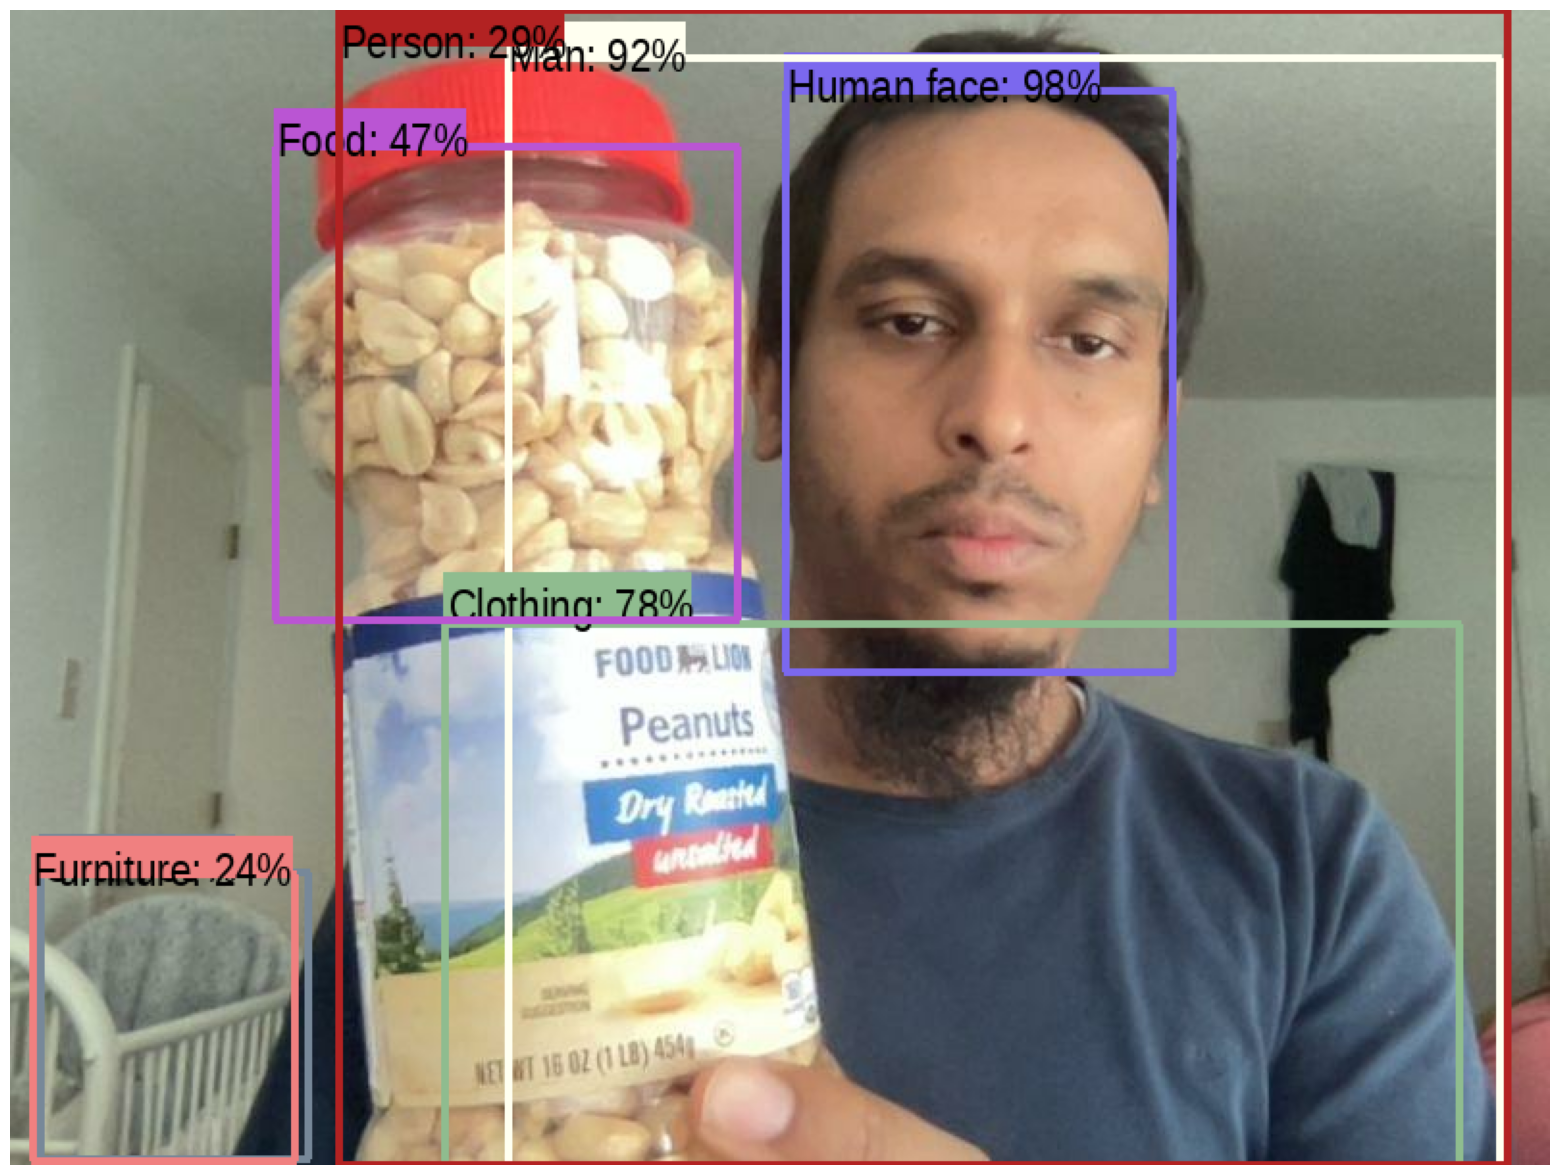

In [10]:
# Detect Image from webcam
run_detector(detector, 'sakib.jpg',  max_boxes=8, max_score=0.2) # >=20% accuracy

In [11]:
import os
import pathlib
import cv2
import PIL

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
import tensorflow_hub as hub

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import html
import time

In [12]:
%%bash
# Clone the tensorflow models repository
git clone --depth 1 https://github.com/tensorflow/models

# API Installation
sudo apt install -y protobuf-compiler
cd models/research
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 491.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.1 MB/s eta 0:00:00
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697357 sha256=ffdfe40c5cd9e7ae15a897b9eec72d3a176f4a6b54897dc7d6ba2a3cb20526bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-veoknvy7/wheels/53/dd/70/2de27

fatal: destination path 'models' already exists and is not an empty directory.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.23.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.


In [13]:
%cd models/research
# Test the installation.
''' If the output shows, [OK] then we're good to go'''
!python object_detection/builders/model_builder_tf2_test.py

/content/models/research
2024-10-20 15:47:00.951094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 15:47:01.260514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 15:47:01.344954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 15:47:03.632523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/models/research/object_detection/builders/model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "/usr/loca

In [14]:
# Path to the file that needs modification
file_path = "/usr/local/lib/python3.10/dist-packages/object_detection/core/freezable_sync_batch_norm.py"

# Read the file content
with open(file_path, 'r') as file:
    file_data = file.readlines()

# Replace the line containing 'SyncBatchNormalization' with 'BatchNormalization'
file_data = [line.replace('tf.keras.layers.experimental.SyncBatchNormalization', 'tf.keras.layers.BatchNormalization') for line in file_data]

# Write the modified content back to the file
with open(file_path, 'w') as file:
    file.writelines(file_data)

print("SyncBatchNormalization has been replaced with BatchNormalization.")


SyncBatchNormalization has been replaced with BatchNormalization.


In [15]:
!python object_detection/builders/model_builder_tf2_test.py


2024-10-20 15:51:53.616471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 15:51:53.651450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 15:51:53.663236: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 15:51:55.066052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1729439518.473835   13388 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

In [16]:
# Define the paths of the files that need modification
file_paths = [
    "/usr/local/lib/python3.10/dist-packages/object_detection/models/keras_models/hourglass_network.py",
    "/usr/local/lib/python3.10/dist-packages/object_detection/builders/model_builder.py"
]

# Replace 'fused=True' with nothing in the required files
for file_path in file_paths:
    with open(file_path, 'r') as file:
        file_data = file.readlines()

    # Remove 'fused=True' from BatchNormalization
    file_data = [line.replace('fused=True', '') for line in file_data]

    # Write the updated content back to the files
    with open(file_path, 'w') as file:
        file.writelines(file_data)

print("Removed 'fused=True' from BatchNormalization.")


Removed 'fused=True' from BatchNormalization.


In [17]:
network = tf.keras.applications.MobileNetV2(input_shape=(None, None, 3), include_top=False)


9406464/9406464 [==============================] - 0s 0us/step


In [18]:
file_path = "/usr/local/lib/python3.10/dist-packages/object_detection/models/center_net_mobilenet_v2_fpn_feature_extractor.py"

# Modify the MobileNetV2 initialization
with open(file_path, 'r') as file:
    file_data = file.readlines()

# Replace the problematic MobileNetV2 initialization
file_data = [line.replace('tf.keras.applications.MobileNetV2(', 'tf.keras.applications.MobileNetV2(input_shape=(None, None, 3), include_top=False,') for line in file_data]

# Write the changes back to the file
with open(file_path, 'w') as file:
    file.writelines(file_data)

print("MobileNetV2 argument issues fixed.")


MobileNetV2 argument issues fixed.


In [19]:
!python object_detection/builders/model_builder_tf2_test.py


2024-10-20 15:56:12.930382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 15:56:12.950357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 15:56:12.955972: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 15:56:14.098754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1729439776.954740   14504 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

In [20]:
!pip uninstall -y keras


Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0


In [21]:
!pip install tf_slim

In [22]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 98274, done.
remote: Counting objects: 100% (787/787), done.
remote: Compressing objects: 100% (422/422), done.
remote: Total 98274 (delta 408), reused 665 (delta 345), pack-reused 97487 (from 1)
Receiving objects: 100% (98274/98274), 621.69 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (71396/71396), done.


In [23]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.


/content/models/research


In [25]:
%cd /content/models/research/
!cp object_detection/packages/tf2/setup.py .
!pip install .


/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697357 sha256=d30cf25da31c36a28736e251f47c4702495c98194ca7123ea487f699be00e39b
  Stored in directory: /tmp/pip-ephem-wheel-cache-l2gechnz/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object_detection
  Attempting uninstall: object_detection
    Found existing installation: object_detection 0.1
    Uninstalling object_detection-0.1:
      Successfully uninstalled object_detection-0.1


In [26]:
!python object_detection/builders/model_builder_tf2_test.py


2024-10-20 16:02:24.736492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 16:02:24.799057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 16:02:24.820874: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 16:02:27.050741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/models/research/object_detection/builders/model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "/usr/local/lib/python3.10/dist-pac

In [27]:
file_path = "/usr/local/lib/python3.10/dist-packages/object_detection/core/freezable_sync_batch_norm.py"

# Replace 'experimental.SyncBatchNormalization' with 'SyncBatchNormalization'
with open(file_path, 'r') as file:
    file_data = file.read()

# Update SyncBatchNormalization reference
file_data = file_data.replace('tf.keras.layers.experimental.SyncBatchNormalization', 'tf.keras.layers.SyncBatchNormalization')

# Write the updated content back to the file
with open(file_path, 'w') as file:
    file.write(file_data)

print("Updated SyncBatchNormalization reference.")


Updated SyncBatchNormalization reference.


In [28]:
!python object_detection/builders/model_builder_tf2_test.py


2024-10-20 16:04:06.340933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 16:04:06.360337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 16:04:06.366147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 16:04:07.533925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/models/research/object_detection/builders/model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "/usr/local/lib/python3.10/dist-pac

In [29]:
file_path = "/usr/local/lib/python3.10/dist-packages/object_detection/core/freezable_sync_batch_norm.py"

# Replace 'SyncBatchNormalization' with 'BatchNormalization'
with open(file_path, 'r') as file:
    file_data = file.read()

# Update SyncBatchNormalization reference to BatchNormalization
file_data = file_data.replace('tf.keras.layers.SyncBatchNormalization', 'tf.keras.layers.BatchNormalization')

# Write the updated content back to the file
with open(file_path, 'w') as file:
    file.write(file_data)

print("Updated SyncBatchNormalization to BatchNormalization.")


Updated SyncBatchNormalization to BatchNormalization.


In [30]:
!python object_detection/builders/model_builder_tf2_test.py


2024-10-20 16:05:34.133647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 16:05:34.160617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 16:05:34.166179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 16:05:35.316861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1729440338.471552   17065 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

In [31]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [32]:
def record_video(filename='../../output.avi'):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab,
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;
      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has
      // been successfully started. Since this is async, the function will be
      // paused until this has started playing.
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

def play_video(video_path):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  #print(video_url)
  HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [33]:
# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode

video_width = 300

# Capture video and save
video_path = record_video()

# Play captured video
video_file = open(video_path, "r+b").read()
video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

Output hidden; open in https://colab.research.google.com to view.

In [34]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array) # numpy array into PIL image object
  iobuf = io.BytesIO()

  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')

  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [35]:
def run_inference_for_single_image(model, image, live_cam):

    # convert image into numpy
    image = np.asarray(image)
    #print('Converted image into numpy type:', type(image))

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    #print('Converted numpy into tensor format:', input_tensor)

    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]

    # Run inference
    if not live_cam:
      start_time = time.time()
      output_dict = model(input_tensor)
      end_time = time.time()
      print(f"Inference time: {np.ceil(end_time-start_time)} seconds per frame")

    output_dict = model(input_tensor)
    num_detections = int(output_dict.pop('num_detections')) # 300

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.

    output_dict = {key: value[0, :num_detections].numpy()
                   for key, value in output_dict.items()}

    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

    return output_dict

def run_inference_video(model, video_path, live_cam):
  cap = cv2.VideoCapture(video_path)
  if cap.isOpened():
      width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
      height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
      res=(int(width), int(height))

      # save detected video
      # Initialize our video writer
      fourcc = cv2.VideoWriter_fourcc(*"XVID") #codec
      out = cv2.VideoWriter('../../detected_output.avi', fourcc, 20.0, res)
      frame = None

      while True:
          try:
              is_success, image_np = cap.read()
          except cv2.error:
              continue

          if not is_success:
              break

          # Actual detection.
          output_dict = run_inference_for_single_image(model, image_np, live_cam)

          # Visualization of the results of a detection.
          viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np,
              output_dict['detection_boxes'],
              output_dict['detection_classes'],
              output_dict['detection_scores'],
              category_index,
              instance_masks=output_dict.get('detection_masks_reframed', None),
              use_normalized_coordinates=True,
              line_thickness=8)

          out.write(image_np)

      out.release()

      # OPTIONAL: show last image
      if frame:
        cv2_imshow(frame)

  cap.release()

def run_inference_in_anaconda(model):
  """ Function for Inferencing live video in anaconda environment """
  cap = cv2.VideoCapture(0)
  while cap.isOpened():
      ret, image_np = cap.read()

      # Actual detection.
      output_dict = run_inference_for_single_image(model, image_np, None)

      # Visualization of the results of a detection.
      viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np,
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          category_index,
          instance_masks=output_dict.get('detection_masks_reframed', None),
          use_normalized_coordinates=True,
          line_thickness=8)

      cv2.imshow('object_detection', cv2.resize(image_np, (800, 600)))

      if cv2.waitKey(1) == ord('q'):
          writer.write(image_np)
          writer.release()
          cap.release()
          cv2.destroyAllWindows()
          break

In [36]:
PATH_TO_LABELS = 'object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

model_handle = 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1'

print('loading model...')
hub_model = hub.load(model_handle)
print('model loaded!')

loading model...
model loaded!


In [37]:
#Inference on captured video
video_path = '../../output.avi'
run_inference_video(hub_model, video_path, live_cam=False)

'''Download "detected_output.avi" video and play in your laptop video player'''

Inference time: 8.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 5.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 4.0 seconds per frame
Inference time: 6.0 seconds per frame
Inference ti

'Download "detected_output.avi" video and play in your laptop video player'

In [38]:
# Input video path
save_path = "/content/detected_output.avi"

# Compressed video path
compressed_path = "/content/output_faster-rcnn.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [39]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = None
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # Actual detection.
    output_dict = run_inference_for_single_image(hub_model, img, live_cam=True)

    # Visualization of the results of a detection.
    viz_utils.visualize_boxes_and_labels_on_image_array(
        img,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)

    # Convert OpenCV BGR format to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert numpy image type to Base64 image byte string type
    # for JavaScript Video object
    bbox_bytes = bbox_to_bytes(img)

    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>